### Grain size distribution for each Yerba Mate granulometry

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_1 = pd.read_csv('coarse\dimensions_YM2_gruesa_297x210.jpg.csv')
df_2 = pd.read_csv('medium\dimensions_YM2_medium_297x210.jpg.csv')
df_3 = pd.read_csv('fine\dimensions_YM2_fine_297x210.jpg.csv')
df_4 = pd.read_csv('extrafine\dimensions_YM2_extrafine_200x150.jpg.csv')

df_tot = pd.concat([df_1, df_2, df_3, df_4])
df_1


,length,width,granulometry
0,1.100478,6.538462,coarse
1,3.062201,3.942308,coarse
2,4.114833,6.442308,coarse
3,3.444976,5.288462,coarse
4,3.014354,3.557692,coarse
...,...,...,...
599,4.114833,7.115385,coarse
600,14.354067,12.644231,coarse
601,5.502392,8.028846,coarse
602,9.808612,9.759615,coarse


Processing group: coarse
Processing group: extrafine
Processing group: fine
Processing group: medium


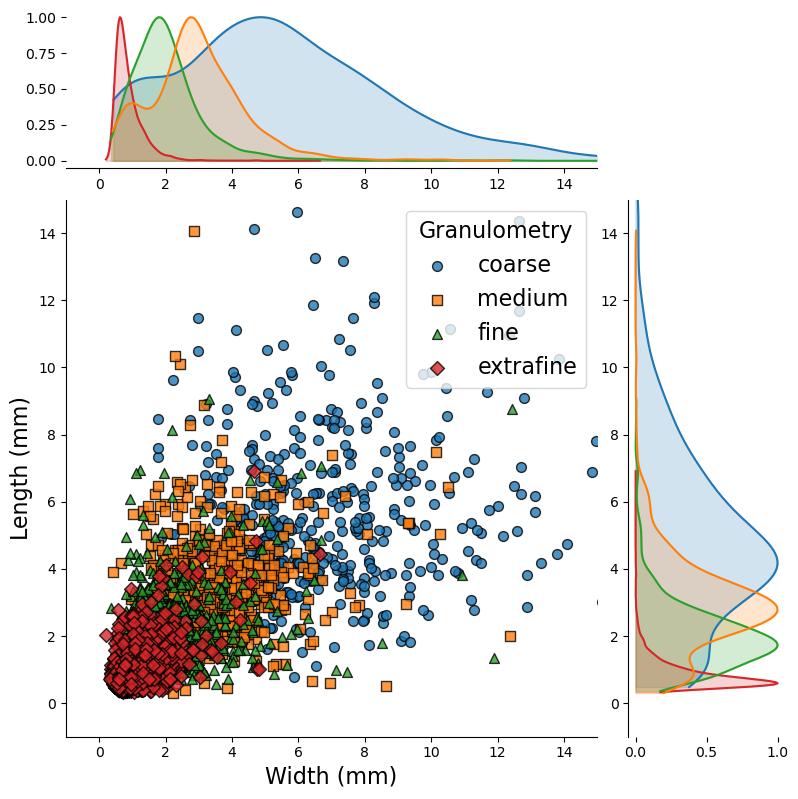

In [7]:
from scipy.stats import gaussian_kde
# fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ax = ax.flatten()

#g = sns.jointplot(data=df_tot, x='width', y='length',hue='granulometry', kind='scatter', ratio=3, marginal_kws={})

# Create jointplot
g = sns.jointplot(
    data=df_tot,
    x='width',
    y='length',
    hue='granulometry',
    kind='scatter',
    height=8,
    ratio=3,
    palette='deep',
    s=50,  # Size of the markers
    linewidth=0.5,
    marker='o',
    edgecolor='black',
    alpha=0.8,
    legend=False,

)

# Access the marginal axes
ax_marg_x = g.ax_marg_x
ax_marg_y = g.ax_marg_y

# Clear marginal axes
ax_marg_x.clear()
ax_marg_y.clear()

# Plot KDEs for each 'granulometry' group
colors = [sns.color_palette()[0], sns.color_palette()[3], sns.color_palette()[2], sns.color_palette()[1]]

def plot_normalized_kde(ax, data, orientation='horizontal', color='blue'):
    # Compute KDE
    kde = gaussian_kde(data)
    # Generate x or y values for plotting
    if orientation == 'horizontal':
        x_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(x_vals)
        # Normalize to max=1
        kde_vals /= kde_vals.max()
        # Fill with lighter color first
        ax.fill_between(x_vals, 0, kde_vals, color=color, alpha=0.2)
        # Plot main line
        ax.plot(x_vals, kde_vals, color=color)
        ax.set_xlabel('Width (mm)')
        ax.set_ylabel('Density (normalized)')
    else:
        y_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(y_vals)
        kde_vals /= kde_vals.max()
        # Fill with lighter color first
        ax.fill_betweenx(y=y_vals, x1=0, x2=kde_vals, color=color, alpha=0.2)
        # Plot main line
        ax.plot(kde_vals, y_vals, color=color)
        ax.set_ylabel('Length (mm)')
        ax.set_xlabel('Density (normalized)')



for i, (group, group_df) in enumerate(df_tot.groupby('granulometry')):
    print(f"Processing group: {group}")
    # Plot for x margin
    plot_normalized_kde(ax_marg_x, group_df['width'], orientation='horizontal', color=colors[i])
    # Plot for y margin
    plot_normalized_kde(ax_marg_y, group_df['length'], orientation='vertical', color=colors[i])


# Remove existing scatter plots
for artist in g.ax_joint.collections:
    artist.set_visible(False)

# Define marker styles for each 'granulometry' group
markers = {'coarse': 'o', 'medium': 's', 'fine': '^', 'extrafine': 'D'}  # adjust categories accordingly

# Plot points manually for each 'granulometry' group with specific markers
for i, (group_value, marker_shape) in enumerate(markers.items()):
    group_df = df_tot[df_tot['granulometry'] == group_value]
    g.ax_joint.scatter(
        group_df['width'],
        group_df['length'],
        marker=marker_shape,
        label=group_value,
        edgecolor='black',
        color=sns.color_palette()[i],
        s=50,
        alpha=0.8
    )



fontsize = 16
#plt.xlim(0, 16)
#plt.ylim(0, 16)
#plt.yscale('log')
#plt.xscale('log')
plt.xlim([-1, 15])
plt.ylim([-1, 15])
plt.xlabel('Width (mm)', fontsize=fontsize)
plt.ylabel('Length (mm)', fontsize=fontsize)
plt.legend(title='Granulometry', fontsize=fontsize, title_fontsize=fontsize)
plt.show()

In [3]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
df_tot[df_tot['granulometry']=='coarse']['length']

0       1.100478
1       3.062201
2       4.114833
3       3.444976
4       3.014354
         ...    
599     4.114833
600    14.354067
601     5.502392
602     9.808612
603     5.645933
Name: length, Length: 604, dtype: float64